# Exploring Video Game Sales Trends and Predicting Future Sales 

## By Brunel Kompaore

This dataset contains a collection of video games and their sales data, compiled through a scrape of vgchartz.com. (https://www.kaggle.com/gregorut/videogamesales)

## Study Question


#### What are the top 5 genres with the highest global sales?
#### What are the top 5 publishers with the highest global sales?
#### What are the top 5 platforms with the highest global sales?
#### What time period between 1980 and 2020 saw the highest global sales?
#### How do sales trends vary across the four major regions (NA, EU, JP, Other) from 1980 to 2020?
#### How have platform and genre sales evolved over time, and which combinations perform best?
#### Which variable among 'Genre', 'Publisher', and 'Platform' most influences high global sales?
#### Predict Global sale for 2025 for top 5 publisher on theire best platform/Genre


# Install necessary libraries

In [7]:
!pip install pandas matplotlib seaborn scikit-learn 

# Load and Prepare the Data

In [9]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv("../data/vgsales.csv")

# Display the first few rows to check the data
print(df.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


## Before cleaning, let’s copy the original data first:

In [11]:
df_copy = df.copy()

# Data Cleaning

## Analising dataset to have idea on data type etc. and potentiel erreur

In [14]:
# using the .info to have some idea on the dataset
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [15]:
#see years declarations
df_copy['Year'].describe()

count    16327.000000
mean      2006.406443
std          5.828981
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [16]:
#Check the number of data points per gender 
df_copy['Genre'].value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

In [17]:
#identify the minimum values of Global _sales for each game
df_copy['Global_Sales'].min()

0.01

 ## Ensure data types are correct

## Check for inconsistencies in global_sales

In [20]:
#Exclude games with global sales ≤ 0.01 to focus on meaningful data
test = df_copy

#Find inconsistencies data
#The != operator identifies rows where Global_Sales does not equal the sum of sales from each region
inconsistent_rows = test[
    test['Global_Sales']!= (
        test['NA_Sales'] + test['EU_Sales'] + test['JP_Sales'] + test['Other_Sales']
    )
] 

#Counting by using .shape[0] : it will returns the number of rows in the inconsistent_rows DataFrame.
inconsistent_count = inconsistent_rows.shape[0]
print(f"Number of rows with inconsistent sales data: {inconsistent_count}")


Number of rows with inconsistent sales data: 6772


there are 6772 rows with inconsistent sales data

## Handle inconsistencies in global_sales by assigning correct values

In [23]:
df_copy['Global_Sales'] = df_copy['NA_Sales'] + df_copy['EU_Sales'] + df_copy['JP_Sales']+df_copy['Other_Sales']

In [24]:
#test by doing the same operation but lets refractor the code to make it shorter
df_copy[df_copy['Global_Sales'] != df_copy['NA_Sales']+df_copy['EU_Sales']+df_copy['JP_Sales']+df_copy['Other_Sales']].shape[0]

0

In [25]:
## Locking for duplicate values
duplicate_values_count = df_copy[df_copy.duplicated()].shape[0]
print(f"Number of rows with duplicate data: {duplicate_values_count}")


Number of rows with duplicate data: 0


## Check and visualize missing values ​​in the dataset

missing valueYear         271
Publisher     58
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

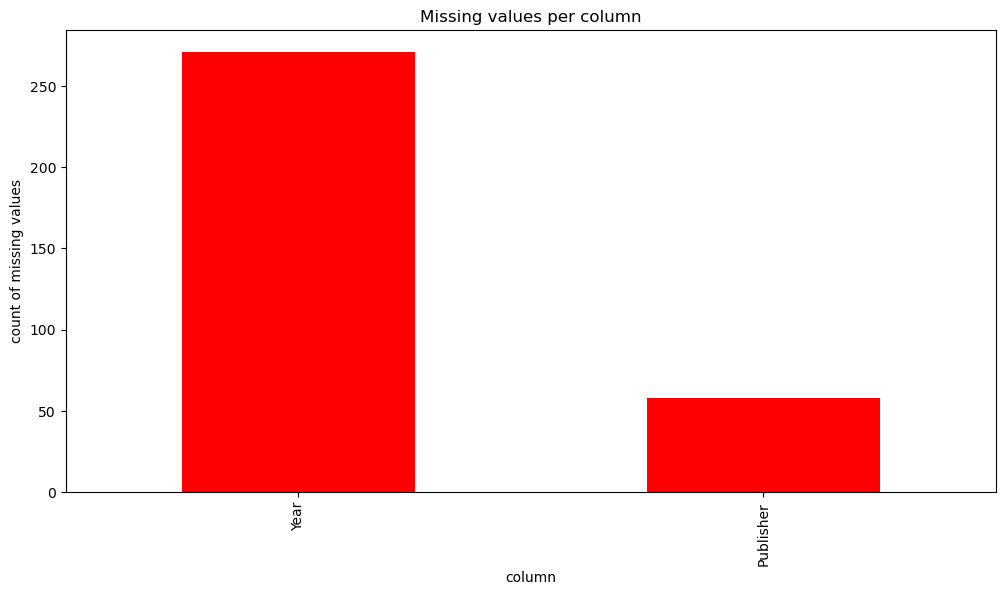

In [28]:
# Check for missing value in the dataset
missing_value = df_copy.isnull().sum()

#keep values gratter than 0
missing_value=missing_value[missing_value>0]
#print missing values by column 
print(f'missing value{missing_value}')

# visualizing missing values
import seaborn as sns
import matplotlib.pyplot as plt

# plot the missing values into a bar plot
plt.figure(figsize=(12,6))
missing_value.plot(kind='bar',color='red')
plt.title('Missing values per column')
plt.xlabel('column')
plt.ylabel('count of missing values')
plt.show


In [30]:
# Drop rows where 'Year' or 'Publisher' is missing
# df_copy.dropna(axis=0, how='any',inplace=True)
df_copy = df_copy.dropna(subset=['Year', 'Publisher'], axis=0)


# Verify that rows were dropped
missing_value = df_copy.isnull().sum()
print(f'missing value{missing_value}')

print(f"Rows after dropping missing values: {df_copy.shape[0]}")



missing valueRank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64
Rows after dropping missing values: 16291


## save the cleaned dataFrame and use it after

In [32]:
# store the file
df_copy.reset_index(drop=True)
df_copy.to_csv("../data/clean_vgsales.csv")

In [33]:
#load data
clean_df = pd.read_csv('../data/clean_vgsales.csv')

# Exploratory Data Analysis

In [35]:
#using the .describe for statistical informations
clean_df.describe()

,Unnamed: 0,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8288.086060,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540637
std,4792.375439,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567460
min,0.000000,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4130.500000,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8290.000000,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12437.500000,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16597.000000,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## Have idea on publisher details

In [37]:
clean_df['Publisher'].value_counts().describe()

count     576.000000
mean       28.282986
std       115.417374
min         1.000000
25%         1.000000
50%         3.000000
75%        10.000000
max      1339.000000
Name: count, dtype: float64

Since 50% of publishers have released 3 or fewer games, we should consider excluding publishers with fewer than 3 games from the analysis. By focusing on publishers with more substantial portfolios, we can ensure that the analysis reflects more consistent and impactful players in the market.
Only when calculating mean values.

In [39]:
# Group by Publisher and filter publishers with more than 3 games
publishers_with_multiple_games_df = clean_df.groupby('Publisher').filter(lambda x: len(x) >= 3)

# Display the count of games per publisher in the filtered DataFrame
publishers_with_multiple_games_df['Publisher'].value_counts().describe()

count     317.000000
mean       50.362776
std       152.156745
min         3.000000
25%         4.000000
50%         9.000000
75%        23.000000
max      1339.000000
Name: count, dtype: float64

we keep this filtered dataframe in publishers_with_multiple_games_df to work with it if necessary

## What are the top 5 genres with the highest global sales?

In [42]:
# Group the data by 'Genre' and calculate the mean of 'Global_Sales' for each genre
top_genres = publishers_with_multiple_games_df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=True).tail(5)
top_genres

Genre
Sports          0.572066
Racing          0.598554
Role-Playing    0.636570
Shooter         0.814174
Platform        0.953429
Name: Global_Sales, dtype: float64

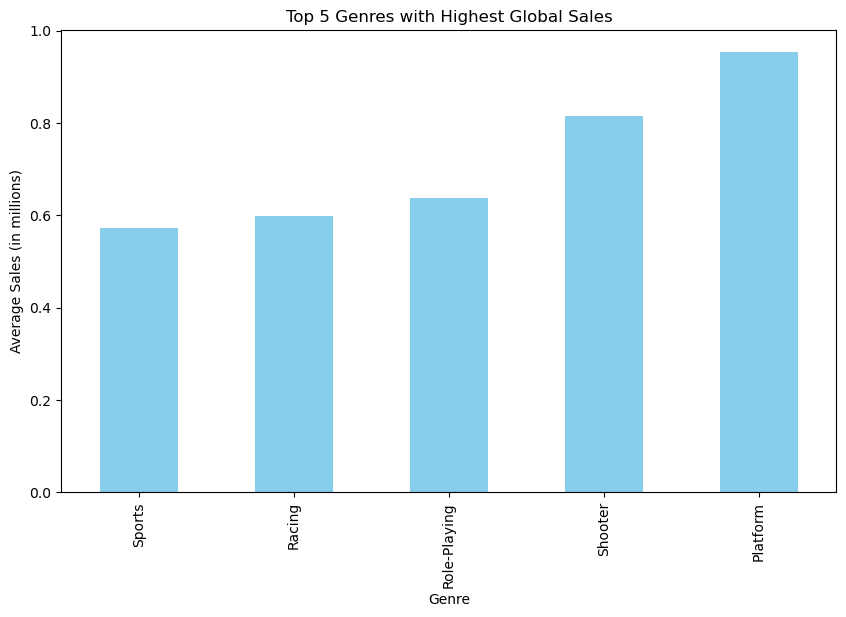

In [43]:
# Plot the top 5 genres with the highest global sales as a bar chart
top_genres.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 5 Genres with Highest Global Sales')
plt.ylabel('Average Sales (in millions)')
plt.xlabel('Genre')
plt.show()

The top 5 genres with the highest average global sales are Platform, Shooter, Role-Playing, Racing, and Sports, with Platform leading the list.

# What are the top 5 publishers with the highest global sales?

here we're going to use publishers_with_multiple_games_df because we want the top 'Global_Sales' for each Publisher 

In [47]:
# Group the data by 'Publisher' and calculate the mean of 'Global_Sales' for each Publisher
top_publishers = publishers_with_multiple_games_df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=True).tail(5)
top_publishers 

Publisher
Ubisoft                         473.33
Sony Computer Entertainment     607.27
Activision                      721.06
Electronic Arts                1093.21
Nintendo                       1784.23
Name: Global_Sales, dtype: float64

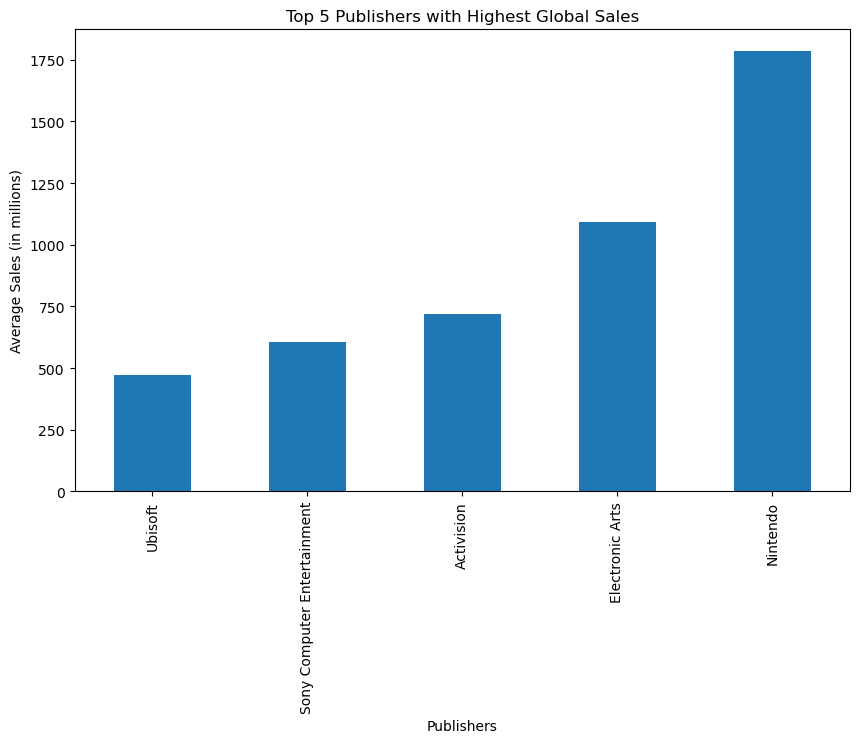

In [48]:
# Plot the top 5 Publishers with the highest global sales as a bar chart
top_publishers.plot(kind='bar', figsize=(10, 6))
plt.title('Top 5 Publishers with Highest Global Sales')
plt.ylabel('Average Sales (in millions)')
plt.xlabel('Publishers')
plt.show()

In [49]:
top_publishers.index

Index(['Ubisoft', 'Sony Computer Entertainment', 'Activision',
       'Electronic Arts', 'Nintendo'],
      dtype='object', name='Publisher')

The top 5 publishers with the highest global sales are Imagic, Microsoft Game Studios, Sony Computer Entertainment Europe, RedOctane, and Nintendo.

# What are the top 5 platforms with the highest global sales?

In [52]:
top_platforms = clean_df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=True).tail(5)
top_platforms

Platform
DS       817.89
Wii      909.20
PS3      949.39
X360     969.30
PS2     1233.56
Name: Global_Sales, dtype: float64

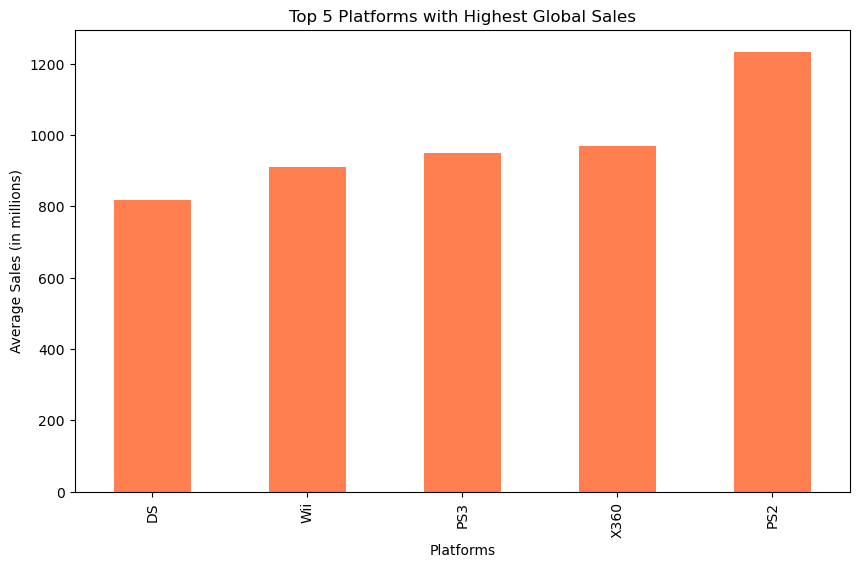

In [53]:
# Plot the top 5 Platforms with the highest global sales as a bar chart
top_platforms.plot(kind='bar', figsize=(10, 6),color='coral')
plt.title('Top 5 Platforms with Highest Global Sales')
plt.ylabel('Average Sales (in millions)')
plt.xlabel('Platforms')
plt.show()

# What time period between 1980 and 2020 saw the highest global sales?

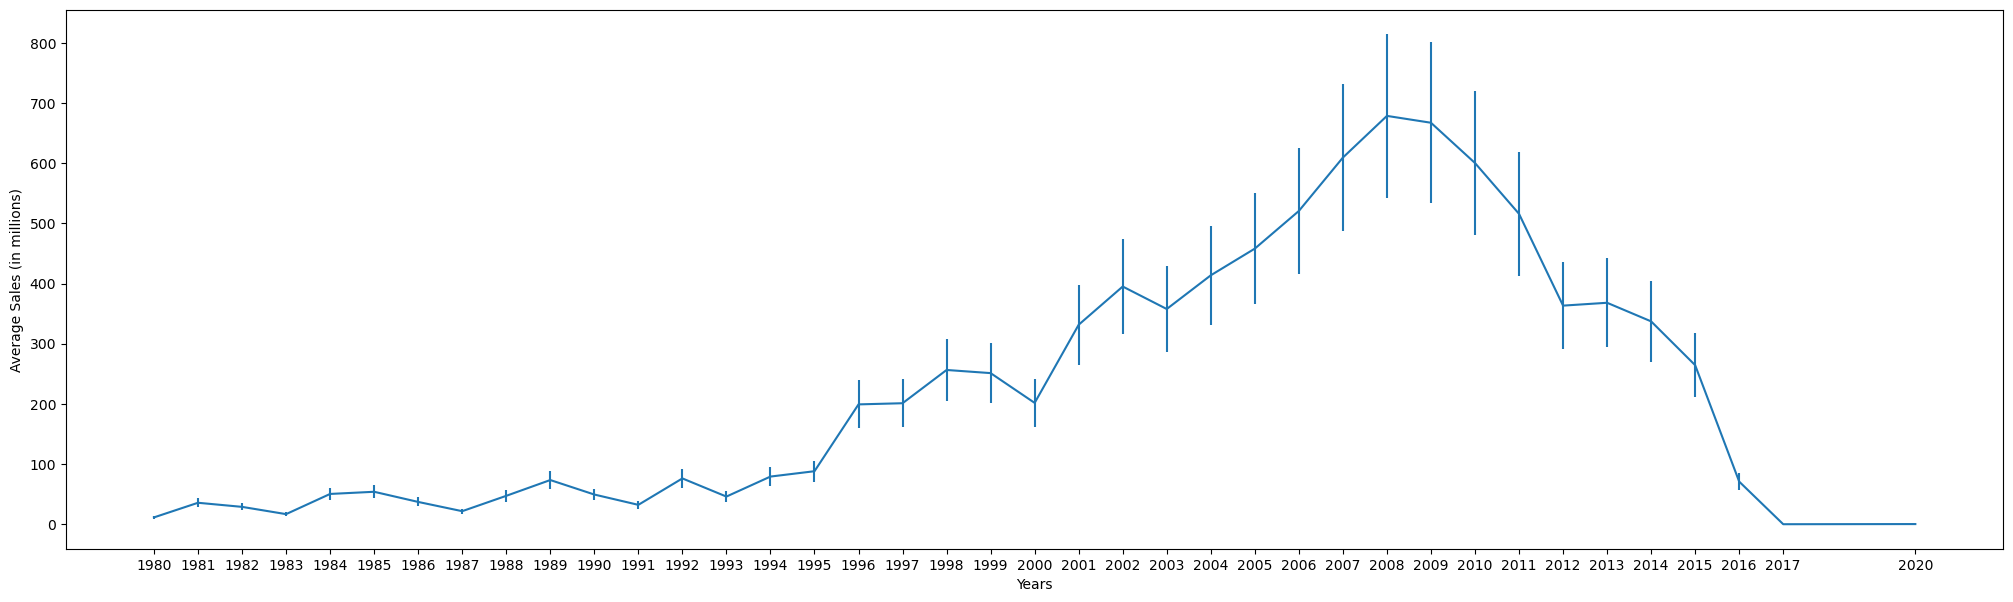

In [55]:
# Filter data between 1980 et 2020
df_filtered = clean_df[(clean_df['Year'] >= 1980) & (clean_df['Year'] <= 2020)]

# Groupe by year
region_sales_sum = df_filtered.groupby('Year')['Global_Sales'].sum()

fig, ax1 = plt.subplots(figsize=(25,7))
ax1.set_xticks(region_sales_sum.index)  
ax1.errorbar(region_sales_sum.index,region_sales_sum, yerr=region_sales_sum/5)
plt.ylabel('Average Sales (in millions)')
plt.xlabel('Years')
plt.show()

we can see that the time period between 2005 and 2009 saw the highest global sales, peaking in 2008 with total sales of 678.49 million. This 5-year range represents the golden era of the video game industry, where sales consistently grew and remained at their highest levels.

# How do sales trends vary across the four major regions (NA, EU, JP, Other) from 1980 to 2020?

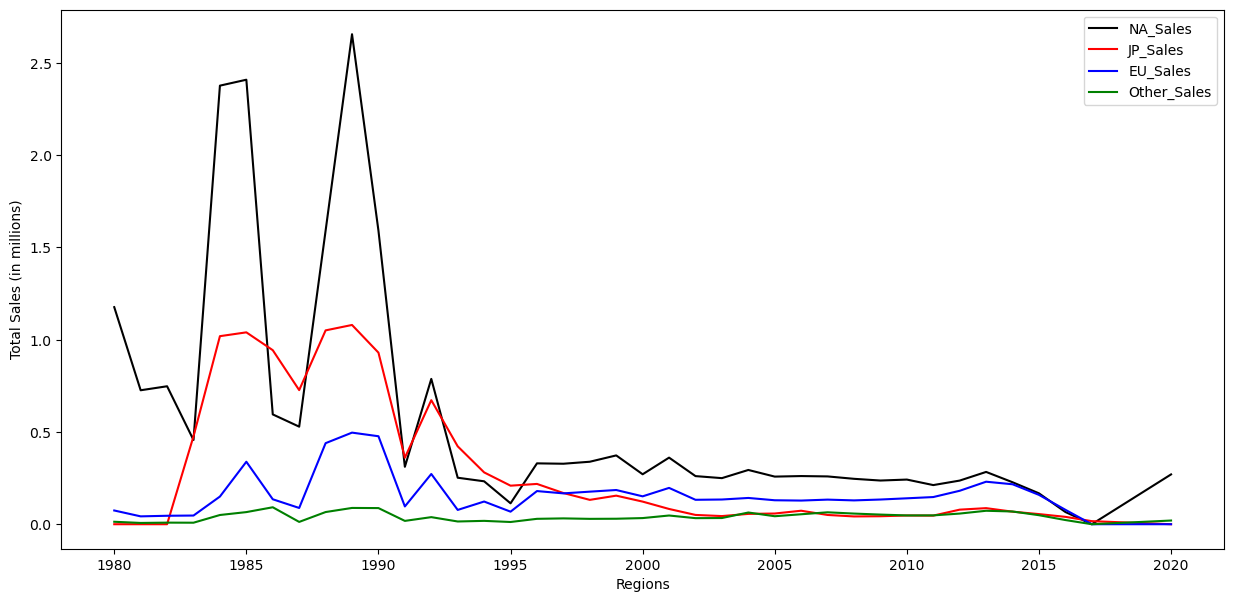

In [58]:
regions_df = df_filtered.groupby('Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].mean()  

fig, ax2 = plt.subplots(figsize=(15,7))
ax2.errorbar(regions_df.index,regions_df['NA_Sales'],color='black',label='NA_Sales')
ax2.errorbar(regions_df.index,regions_df['JP_Sales'],color='red',label='JP_Sales')
ax2.errorbar(regions_df.index,regions_df['EU_Sales'],color='blue',label='EU_Sales')
ax2.errorbar(regions_df.index,regions_df['Other_Sales'],color='green',label='Other_Sales')
plt.ylabel('Total Sales (in millions)')
plt.xlabel('Regions')
plt.legend()
plt.show()


North America has consistently led in sales since 1980. However, since 1995, sales across all regions have declined to around 0.25 million units, likely due to the rise of online gaming and digital platforms

# How have platform and genre sales evolved over time, and which combinations perform best?

### evolution by genre

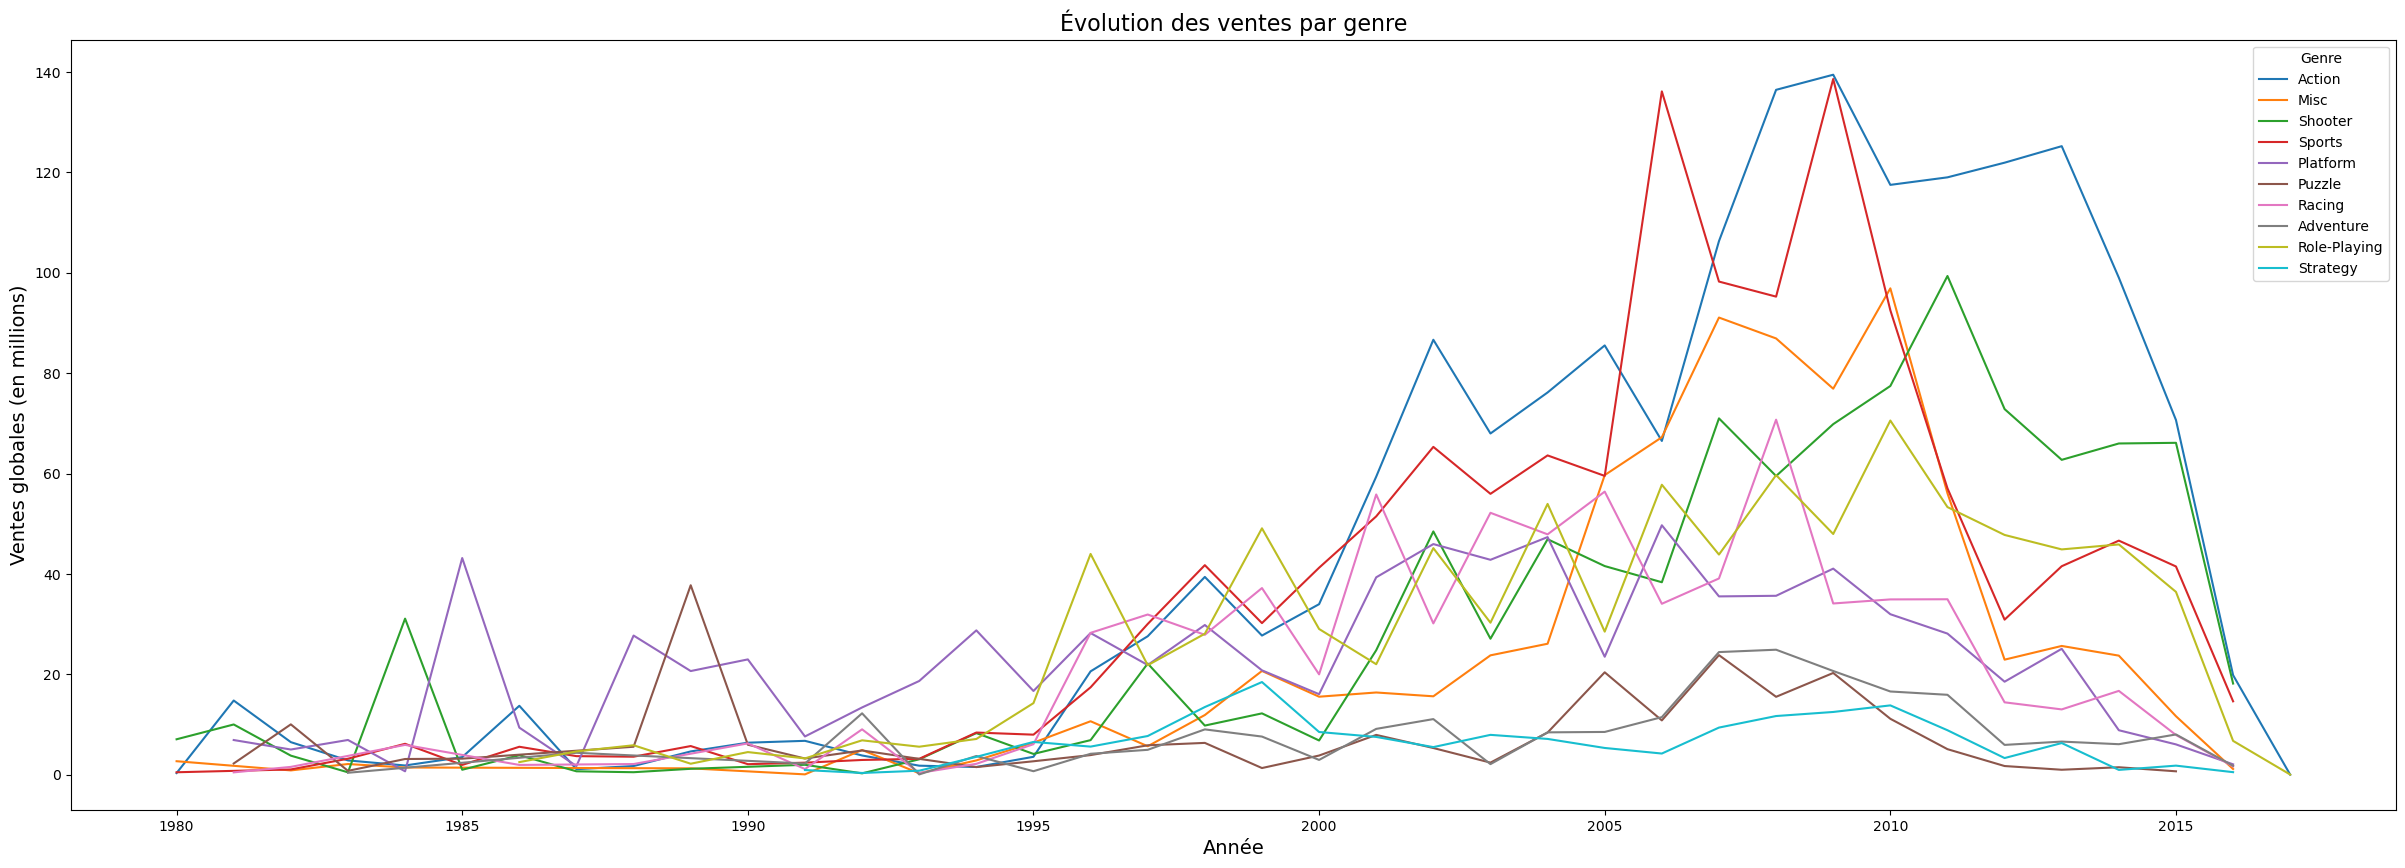

In [62]:
# prepare data by genre
genre_sales_over_time = clean_df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

# Identify the top  5 and 3 worst genres
top_genres_first_7 = genre_sales_over_time.groupby('Genre')['Global_Sales'].sum().nlargest(7).index
top_genres_last_3 = genre_sales_over_time.groupby('Genre')['Global_Sales'].sum().nsmallest(3).index

top_genres_combined = top_genres_first_7.append(top_genres_last_3)

# Filtrer les données pour ne conserver que les genres les plus populaires
filtered_data_genre_sales_over_time = genre_sales_over_time[genre_sales_over_time['Genre'].isin(top_genres_combined)]
plt.figure(figsize=(30,10))

# a line plot for each genre ()easier with seaborn
sns.lineplot(data=filtered_data_genre_sales_over_time, x='Year', y='Global_Sales', hue='Genre')
plt.title('Évolution des ventes par genre', fontsize=16)
plt.xlabel('Année', fontsize=14)
plt.ylabel('Ventes globales (en millions)', fontsize=14)

# Afficher la légende et le graphique
plt.legend(title='Genre')
plt.show()

Global video game sales experienced significant growth starting from the 2000s, reaching peaks between 2010 and 2015, with genres such as Action, Shooter, and Role-Playing dominating the sales charts.

n contrast, genres like Puzzle and Strategy showed relatively low sales throughout the period. However, after 2015, a decline in sales was observed across almost all genres, which could indicate a shift in consumer preferences, possibly linked to the rise of mobile games or market saturation.
For better readability, the analysis focused on the top 7 most popular and top 3 worst genres.


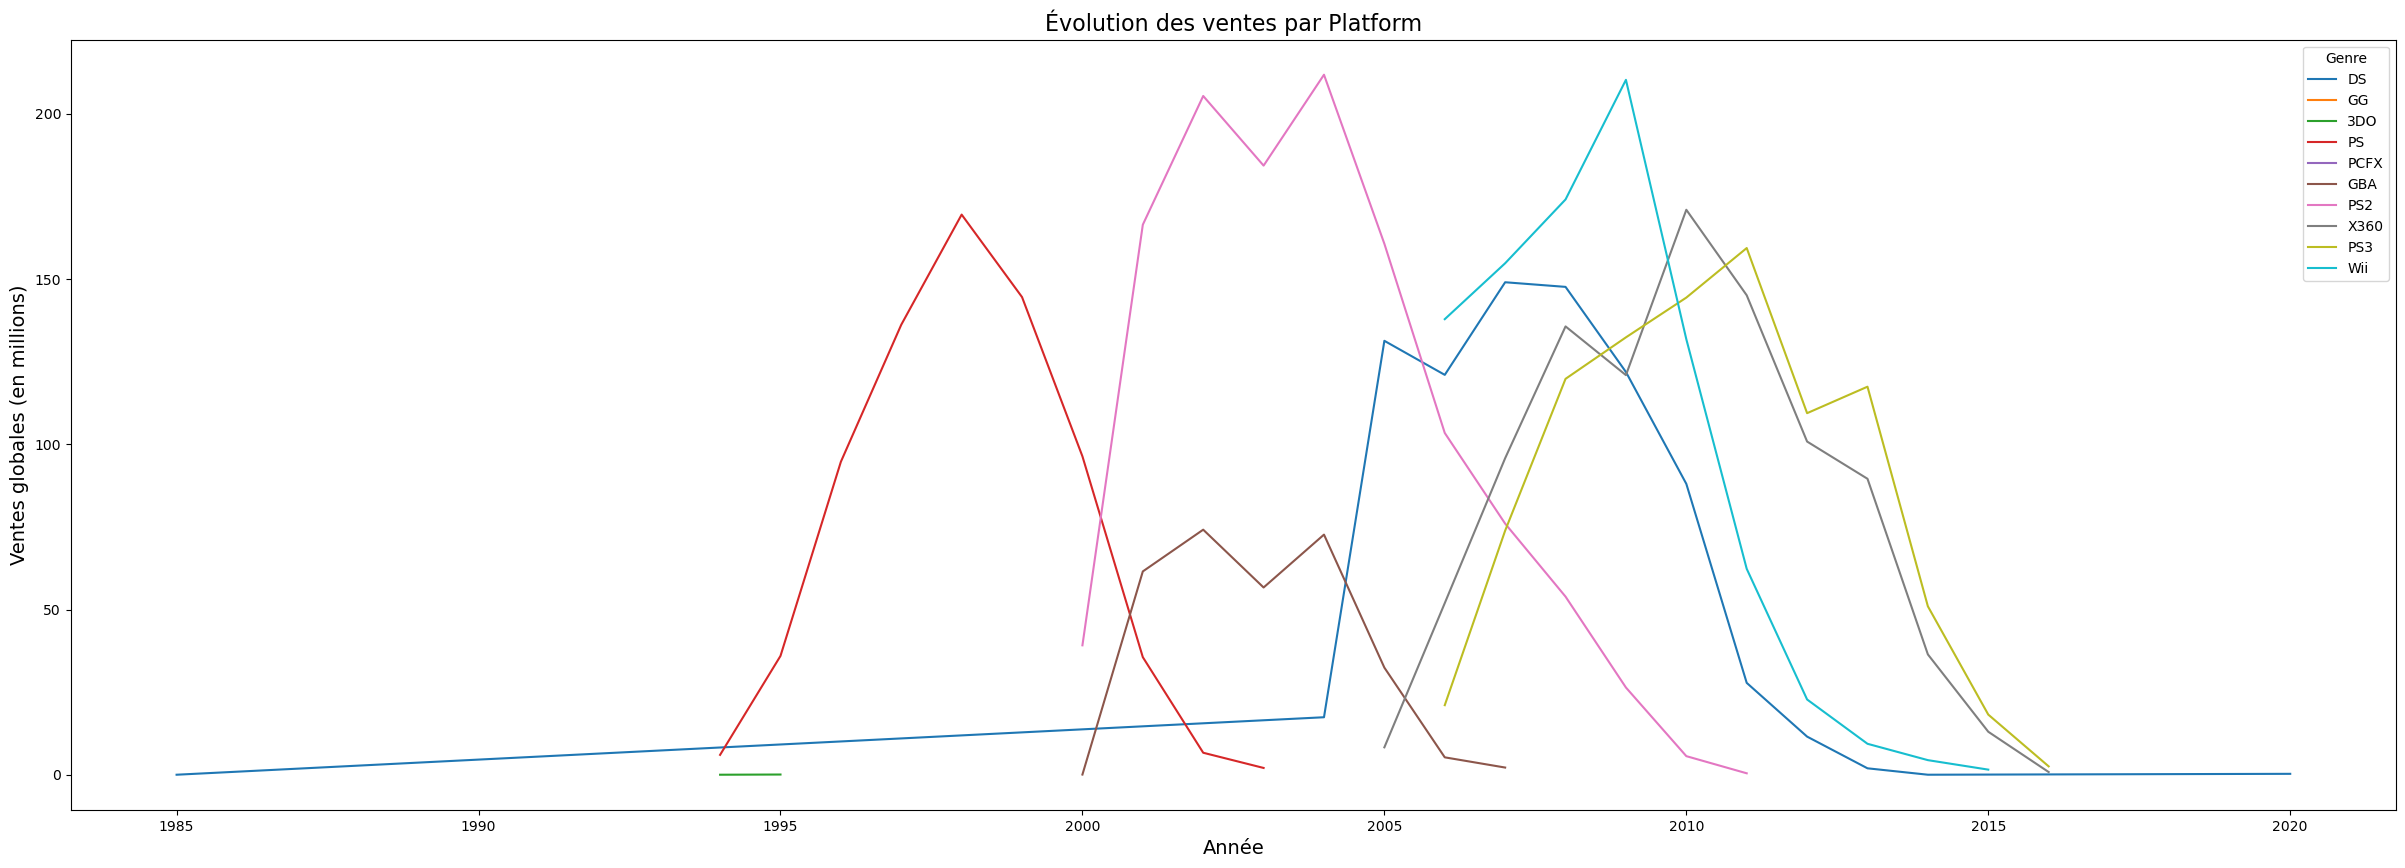

In [64]:
# prepare data by Platform
platform_sales_over_time = clean_df.groupby(['Year','Platform'])['Global_Sales'].sum().reset_index()

# Identify the top  5 and 3 worst platform
top_platforms_first_7 = platform_sales_over_time.groupby('Platform')['Global_Sales'].sum().nlargest(7).index
top_platforms_last_3 = platform_sales_over_time.groupby('Platform')['Global_Sales'].sum().nsmallest(3).index
top_platforms_combined = top_platforms_first_7.append(top_platforms_last_3)

filtered_data_platform_sales_over_time = platform_sales_over_time[platform_sales_over_time['Platform'].isin(top_platforms_combined)]

plt.figure(figsize=(30,10))

# a line plot for each genre ()easier with seaborn
sns.lineplot(data=filtered_data_platform_sales_over_time, x='Year', y='Global_Sales', hue='Platform')
plt.title('Évolution des ventes par Platform', fontsize=16)
plt.xlabel('Année', fontsize=14)
plt.ylabel('Ventes globales (en millions)', fontsize=14)

# Afficher la légende et le graphique
plt.legend(title='Genre')
plt.show()

Between 1985 and 2020, many gaming platforms emerged, with some quickly disappearing due to factors like high production costs and limited game libraries. 
Platforms like the 3DO and Sega Saturn struggled to compete with giants like Sony's PlayStation and Microsoft's Xbox, leading to their decline. 

In contrast, consoles launched between 2000 and 2010, such as the Xbox 360, PlayStation 3, and Nintendo Wii, succeeded due to their innovative features like online play and motion controls. However, platforms like the PSP and Wii U, while initially popular, faded may be due to issues like limited game support and competition from newer technologies. 

This highlights the fast-changing nature of the gaming industry, where only the most adaptable platforms survive.

In [66]:
best_combinations = df.groupby(['Platform', 'Genre'])['Global_Sales'].sum().sort_values(ascending=False).reset_index()
best_combinations.head()

,Platform,Genre,Global_Sales
0,PS3,Action,307.88
1,Wii,Sports,292.06
2,X360,Shooter,278.55
3,PS2,Sports,273.41
4,PS2,Action,272.76


The top platform-genre combinations highlight key industry trends. 

The PS3 with Action games leads sales, reflecting its dominance in action titles. 
The Wii excelled in the Sports genre, benefiting from its motion controls and casual gaming appeal. 
The X360 thrived with Shooter games, emphasizing its role in popularizing the genre. 
Lastly, the PS2 was strong in both Sports and Action, showing its broad appeal across genres. 

These combinations illustrate how certain platforms were key to the success of specific game genres.

# Which variable among 'Genre', 'Publisher', and 'Platform' most influences high global sales?


### Encoding categorical variables

In [70]:
# Encode categorical variables (Genre, Publisher, Platform)
df_encoded = pd.get_dummies(df_filtered[['Genre', 'Publisher', 'Platform']], drop_first=True)

# Add global sales to the encoded DataFrame to calculate correlation
df_encoded['Global_Sales'] = df_filtered['Global_Sales']
df_encoded.head()

,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,...,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Global_Sales
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,82.74
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,40.24
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,35.83
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,33.00
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,31.38


### Calculate the Correlation Matrix

In [72]:
correlation_matrix = df_encoded.corr()

# Display the correlation between the encoded variables and global sales
correlation_matrix['Global_Sales'].sort_values(ascending=False).head()

Global_Sales          1.000000
Publisher_Nintendo    0.272650
Platform_GB           0.102821
Platform_NES          0.100312
Genre_Platform        0.061796
Name: Global_Sales, dtype: float64

### Specific Visualization of Correlation with Global Sales


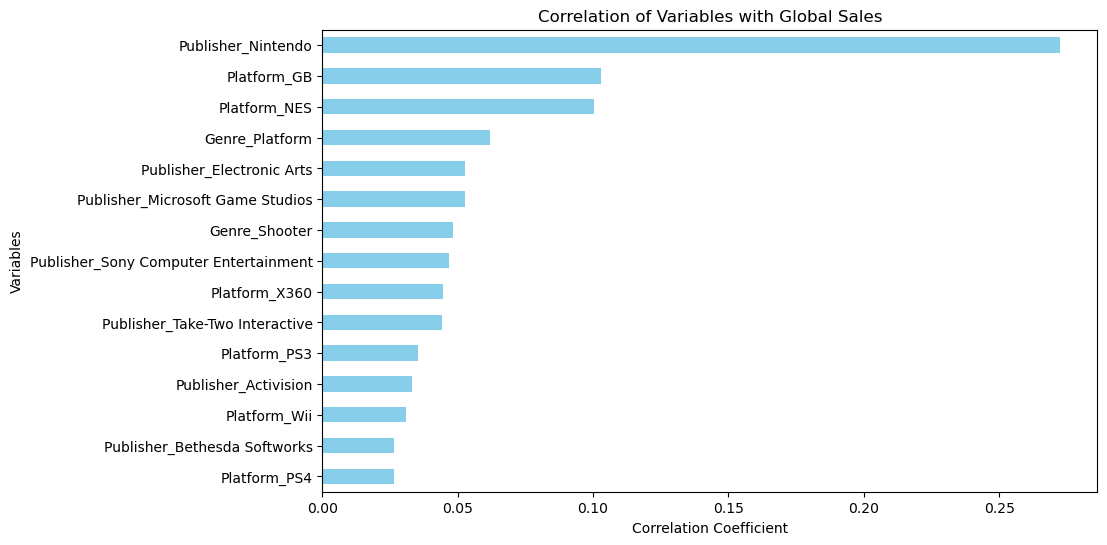

In [74]:
# Display the correlation with global sales
correlation_with_sales = correlation_matrix['Global_Sales'].drop('Global_Sales')  # Remove 'Global_Sales' from the list

plt.figure(figsize=(10, 6))
correlation_with_sales.sort_values(ascending=True).tail(15).plot(kind='barh', color='skyblue')
plt.title('Correlation of Variables with Global Sales')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.show()

Among the Genre, Publisher, and Platform variables, Publisher_Nintendo shows the highest correlation with global sales (0.272). 
However, this doesn't fully determine which variable has the greatest impact, as correlation alone doesn’t imply direct influence. 

More analysis is needed to identify the variable with the most significant effect.

### Calculate the total correlation for each category (Publisher, Genre, Platform)

In [77]:
# Calculate the average correlation for each group (Publisher, Platform, Genre)
# extracts the correlations between 'Global_Sales' and all columns containing 'Publisher' in their names, 
# then calculates the mean of these correlations.
publisher_corr = correlation_matrix['Global_Sales'][df_encoded.columns.str.contains('Publisher')].mean()
platform_corr = correlation_matrix['Global_Sales'][df_encoded.columns.str.contains('Platform')].mean()
genre_corr = correlation_matrix['Global_Sales'][df_encoded.columns.str.contains('Genre')].mean()



# Create a series to compare the mean correlation for Publisher, Genre, and Platform
mean_corr = pd.Series({
    'Publisher': publisher_corr,
    'Genre': genre_corr,
    'Platform': platform_corr
})

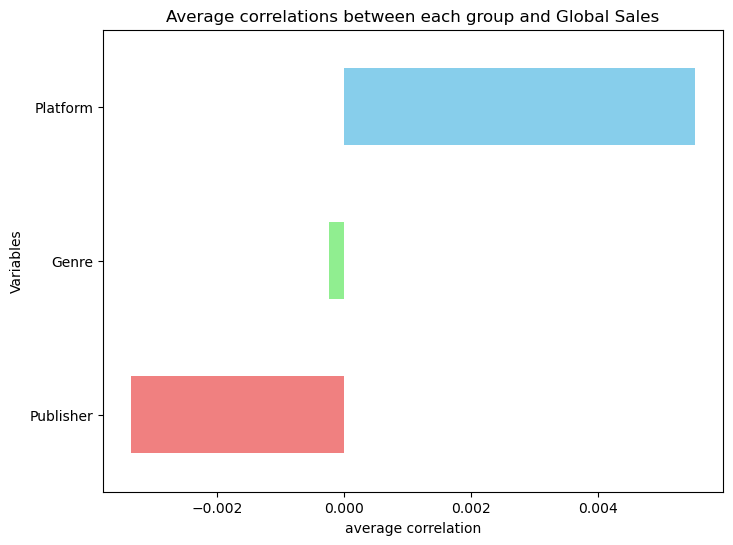

In [78]:
# Visualize the mean correlations with a bar plot
plt.figure(figsize=(8, 6))
mean_corr.sort_values(ascending=True).plot(kind='barh', color=['lightcoral', 'lightgreen', 'skyblue'])
plt.title('Average correlations between each group and Global Sales')
plt.xlabel('average correlation')
plt.ylabel('Variables')
plt.show()

In [79]:
mean_corr

Publisher   -0.003353
Genre       -0.000233
Platform     0.005524
dtype: float64

Among the Publisher, Genre, and Platform variables, Platform shows the highest correlation with global sales, followed by Genre and  Publisher. Although Platform has the highest correlation, these values are relatively low, indicating that none of these variables have a strong direct impact on global sales. maybe other factors


# Predict Sales for top 5 publishers

### import skleanr for prediction

In [83]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,r2_score

### Filter data for the top 5 

In [85]:
top_publishers_list= list(top_publishers.index)
df_top_publishers = publishers_with_multiple_games_df[publishers_with_multiple_games_df['Publisher'].isin(top_publishers_list)]
df_top_publishers.describe()

,Unnamed: 0,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,5891.879809,5893.835905,2006.180178,0.509457,0.293410,0.121048,0.093060,1.016975
std,4351.469223,4351.685930,5.675378,1.345585,0.841952,0.488525,0.272596,2.595552
min,0.000000,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2191.000000,2193.000000,2003.000000,0.070000,0.010000,0.000000,0.010000,0.140000
50%,5049.000000,5051.000000,2007.000000,0.190000,0.070000,0.000000,0.030000,0.380000
75%,9112.000000,9114.000000,2010.000000,0.490000,0.250000,0.020000,0.080000,0.950000
max,16595.000000,16598.000000,2020.000000,41.490000,29.020000,10.220000,8.460000,82.740000


In [86]:
print(df_top_publishers.head())

   Unnamed: 0  Rank                      Name Platform    Year         Genre  \
0           0     1                Wii Sports      Wii  2006.0        Sports   
1           1     2         Super Mario Bros.      NES  1985.0      Platform   
2           2     3            Mario Kart Wii      Wii  2008.0        Racing   
3           3     4         Wii Sports Resort      Wii  2009.0        Sports   
4           4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing   

  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0  Nintendo     41.49     29.02      3.77         8.46         82.74  
1  Nintendo     29.08      3.58      6.81         0.77         40.24  
2  Nintendo     15.85     12.88      3.79         3.31         35.83  
3  Nintendo     15.75     11.01      3.28         2.96         33.00  
4  Nintendo     11.27      8.89     10.22         1.00         31.38  


In [87]:
df_top_publishers['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Fighting', 'Action', 'Adventure',
       'Strategy'], dtype=object)

In [88]:
df_top_publishers['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'SNES', 'GBA', 'PS2', 'X360', '3DS',
       'PS4', 'PS3', 'N64', 'PS', 'PC', 'XOne', 'GC', 'WiiU', '2600',
       'PSP', 'XB', 'PSV', 'DC', 'SAT'], dtype=object)

In [89]:
df_top_publishers['Publisher'].unique()

array(['Nintendo', 'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Electronic Arts'], dtype=object)

### Encode categorical variables and split the data into training and test sett

In [91]:

# Encode categorical variables (Publisher, Platform, Genre) with transformer using OneHotEncoder
column_transformer = ColumnTransformer(
    transformers=[
        ('platform', OneHotEncoder(), ['Platform']),
        ('genre', OneHotEncoder(), ['Genre']),
        ('publisher', OneHotEncoder(), ['Publisher']),
        ('year', 'passthrough', ['Year'])
    ], 
    remainder='passthrough'  # Conserver les autres colonnes non catégorielles
)

# Select the input features (X) and the target variable (y)
X = df_top_publishers[['Publisher', 'Platform', 'Genre','Year']]
y = np.log1p(df_top_publishers['Global_Sales'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build a pipeline to preprocess the data and train a linear regression model

In [93]:
# Create a pipeline that applies the transformer and trains the linear regression model
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('model', LinearRegression())
])

# train the modèl
pipeline.fit(X_train, y_train)

# evaluate
print("Model score on test set : ", pipeline.score(X_test, y_test))

Model score on test set :  0.21780087311585572


#### We trained a linear regression model and evaluated its performance using R-squared and Mean Squared Error (MSE).

In [95]:
y_pred = pipeline.predict(X_test)

MSE (Mean Squared Error): Measures the average squared difference between predicted and actual values. Lower MSE means better model performance.

In [97]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model
print("Mean Squared Error : ", mse)

Mean Squared Error :  0.22781623928218606


R² (R-squared): Shows the proportion of variance in the target variable explained by the model

In [99]:
# Calculate r2_score
score_r2 = r2_score(y_test, y_pred)

print("r2_score : ", score_r2)

r2_score :  0.21780087311585572


An R2 of 0.228 means the model explains 22.8% of the variance in global sales

#### Visualizing predictions versus actual values ​​with a scatter plot

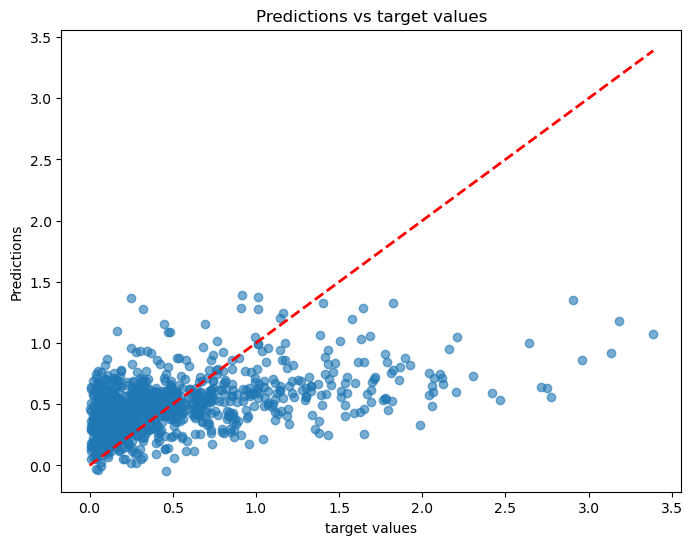

In [102]:
# graph of actual values ​​vs predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('target values')
plt.ylabel('Predictions')
plt.title('Predictions vs target values')
plt.show()

### Predict 2025 sales using the best platform and genre for each publisher

#### Find the best combination of platform and genre for each publisher

In [105]:
# dictionnary to keep each publisher best platform and genre
best_platform_genre = {}

# find out the best combo (plateforme, genre) by publisher
for publisher in df_top_publishers['Publisher'].unique():
    df_publisher = df_top_publishers[df_top_publishers['Publisher'] == publisher]
    best_combination = df_publisher.loc[df_publisher['Global_Sales'].idxmax()]
    
    best_platform = best_combination['Platform']
    best_genre = best_combination['Genre']
    
    best_platform_genre[publisher] = (best_platform, best_genre)

best_platform_genre

{'Nintendo': ('Wii', 'Sports'),
 'Sony Computer Entertainment': ('PS2', 'Racing'),
 'Activision': ('X360', 'Shooter'),
 'Ubisoft': ('Wii', 'Misc'),
 'Electronic Arts': ('PS4', 'Sports')}

#### use the pipeline for prediction

In [107]:
predictions_2025 = []

# we doing the prediction for each publisher separatly using our pipline
for publisher, (best_platform, best_genre) in best_platform_genre.items():
    input_data = pd.DataFrame({
        'Publisher': [publisher],
        'Platform': [best_platform],
        'Genre': [best_genre],
        'Year':[2025]
    })
    
    # prédiction for 2025
    sales_2025 = pipeline.predict(input_data)[0]
    
    predictions_2025.append({
        "Publisher": publisher,
        "Predicted_Sales": sales_2025,
        "Best_Platform": best_platform,
        "Best_Genre": best_genre,
        "Year": 2025
    })

# Convert prédictions to DataFrame
predictions_df = pd.DataFrame(predictions_2025)


print("Sales predictions for 2025 based on top platform and genre : \n")
predictions_df

Sales predictions for 2025 based on top platform and genre : 



,Publisher,Predicted_Sales,Best_Platform,Best_Genre,Year
0,Nintendo,0.699946,Wii,Sports,2025
1,Sony Computer Entertainment,0.226401,PS2,Racing,2025
2,Activision,0.430305,X360,Shooter,2025
3,Ubisoft,0.135613,Wii,Misc,2025
4,Electronic Arts,0.644149,PS4,Sports,2025
